# Introduction to plotting <img align="right" src="../img/LivingWales_logo.png" width="190" height="200">

* **Compatibility:** Notebook currently compatible with the `WDC` environment
* **Products used:** `sen2_l2a_gcp`
* **Prerequisites:** Users of this notebook should have a basic understanding of:
    * How to run a [Jupyter notebook](01_Introduction_jupyter_notebooks.ipynb)
    * The basic structure of the WDC [satellite datasets]()
    * Inspecting available [WDC products and measurements](03_Products_and_measurements.ipynb)
    * How to [load data from WDC](04_Loading_data.ipynb)
    

## Background
Data visualisation is an important component of working with Earth Observation data.
The `xarray` Python package provides a range of straightforward data plotting options that allow users to quickly generate simple plots from multi-dimensional datasets. 
To generate more complex and informative plots, the WDC Notebooks repository also provides a custom plotting module with additional easy-to-use functionality.

## Description
This introductory notebook demonstrates how to visualise WDC satellite data returned from running a datacube query.
The notebook demonstrates commonly used `xarray` plotting methods, as well as custom functions provided in the `wales_utils.data_cube_utilities.display_tools` module.

Topics covered in this notebook include:

1. View an area of interest prior to querying the datacube
2. Querying the datacube and loading data
3. Plotting single band data (e.g. a single satellite band)
    * Selecting and plotting individual timesteps
    * Plotting multiple timesteps
    * Customising plot appearance
4. Plotting three-band true or false colour imagery
    * Plotting single timesteps
    * Plotting multiple timesteps
    * Customising plot appearance

***

## Getting started
To run this analysis, run all the cells in the notebook starting with the "Load packages" cell. For help with running notebook cells, refer back to the [Jupyter Notebooks notebook](01_Introduction_jupyter_notebooks.ipynb).

### Load packages
Load the `datacube` package to enable loading data, the `time` package to retrieve processing time, and a selection of custom WDC functions from the `wales_utils.data_cube_utilities.display_tools` module.

In [2]:
import sys
sys.path.append("../wales_utils/data_cube_utilities")

import datacube
from time import time as time

from display_tools import map_extent, rgb

### Connect to the datacube
The next step is to connect to the datacube database.
The resulting `dc` datacube object can then be used to load data.
The `app` parameter is a unique name used to identify the notebook that does not have any effect on the analysis.

In [3]:
dc = datacube.Datacube(app="05_Plotting")

### Analysis parameters

The following variables are required to establish a query for this notebook:
- `lat_min`, `lat_max`: The latitude range to analyse (e.g. `(52.399, 52.423)`). For reasonable load times, keep this to a range of ~0.1 degrees or less.
- `lon_min`, `lon_max`: The longitude range to analyse (e.g. `(-4.096, -4.060)`). For reasonable load times, keep this to a range of ~0.1 degrees or less.
- `time_min`, `time_max`: The date range to analyse (e.g. `("2018-07-01", "2018-07-31")`).


In [5]:
lon_min= -4.096
lon_max= -4.060
lat_min= 52.399
lat_max= 52.423
time_min= "2018-07-01"
time_max= "2018-07-31"

## View the queried location
Before running a query and extracting and analysing data, it is useful to double-check that your location is correct.
The custom `map_extent()` function, available in the `WDC`, shows your selected area as a red rectangle on an interactive map (i.e., Open Street map and ESRI World Imagery).

World Imagery provides very high resolution (one meter or better) satellite and aerial imagery in many parts of the world. For Wales, images are Maxar (Vivid) imagery, with a 0.50 meters resolution. 

In [6]:
map_extent(extent = (lon_min, lat_min, lon_max, lat_max))

Map(center=[52.411, -4.077999999999999], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_t…

## Query and view data
The variables specified above are used to load data from  the WDC datacube through the `dc.load()`, which was introduced in the [Loading data notebook](04_Loading_data.ipynb).
This introduction will continue to use the `sen2_l2a_gcp` product, as used in the [Loading data notebook](04_Loading_data.ipynb).

In [9]:
start_load= time()
dataset = dc.load(product="sen2_l2a_gcp",
             x=(lon_min, lon_max),
             y=(lat_min, lat_max),
             time=(time_min, time_max),
             output_crs= "epsg:27700",
             resolution= (-10,10))

dataset = dataset/10000
end_load= time()

print("Datacube ready")
print("Took only " + str(round(end_load-start_load,2)) + " seconds to load the data from datacube \
for the specified extent/period (i.e., "+ str(len(dataset.time)*len(dataset.keys())) +" images).")

dataset

Datacube ready
Took only 1.94 seconds to load the data from datacube for the specified extent/period (i.e., 156 images).


<xarray.Dataset>
Dimensions:          (time: 12, y: 275, x: 253)
Coordinates:
  * time             (time) datetime64[ns] 2018-07-02T11:33:21 ... 2018-07-29...
  * y                (y) float64 2.826e+05 2.826e+05 ... 2.799e+05 2.799e+05
  * x                (x) float64 2.575e+05 2.575e+05 ... 2.6e+05 2.6e+05
    spatial_ref      int32 27700
Data variables: (12/13)
    coastal_aerosol  (time, y, x) float64 0.0439 0.0439 0.0439 ... 0.9325 0.9325
    blue             (time, y, x) float64 0.0463 0.0397 0.0429 ... 0.9168 0.9272
    green            (time, y, x) float64 0.0442 0.0402 0.0426 ... 0.8904 0.9088
    red              (time, y, x) float64 0.03 0.0289 0.0296 ... 0.8624 0.9056
    veg5             (time, y, x) float64 0.0302 0.0312 0.0312 ... 0.8819 0.8819
    veg6             (time, y, x) float64 0.0309 0.0296 0.0296 ... 0.8433 0.8433
    ...               ...
    nir              (time, y, x) float64 0.0282 0.0231 0.0268 ... 0.8744 0.8904
    narrow_nir       (time, y, x) float64 0.0312 0.0318 0.0318 ... 0.8008 0.8008
    water_vapour     (time, y, x) float64 0.0263 0.0263 0.0263 ... 0.8938 0.8938
    swir1            (time, y, x) float64 0.0268 0.0261 0.0261 ... 0.4075 0.4075
    swir2            (time, y, x) float64 0.0248 0.0242 0.0242 ... 0.2582 0.2582
    scl              (time, y, x) float64 0.0002 0.0002 0.0002 ... 0.0009 0.0009
Attributes:
    crs:           EPSG:27700
    grid_mapping:  spatial_ref

## Plotting single band images

The `xarray` package provides built-in methods for plotting individual data variables or measurements.

To do this, identify the measurement (i.e., band/variable) to plot.
In this example, the `swir1` satellite band is used.
To plot a single band, the data must be an `xarray.DataArray` (to revise the difference between `xarray.Dataset` and `xarray.DataArray` objects, refer back to the [Loading data](04_Loading_data.ipynb) notebook):

In [10]:
dataset.swir1

<xarray.DataArray 'swir1' (time: 12, y: 275, x: 253)>
array([[[0.0268, 0.0261, 0.0261, ..., 0.3006, 0.3202, 0.3202],
        [0.0268, 0.0267, 0.0267, ..., 0.2646, 0.3134, 0.3134],
        [0.0268, 0.0267, 0.0267, ..., 0.2646, 0.3134, 0.3134],
        ...,
        [0.02  , 0.0197, 0.0197, ..., 0.383 , 0.3757, 0.3757],
        [0.0204, 0.0212, 0.0212, ..., 0.4067, 0.3904, 0.3904],
        [0.0204, 0.0212, 0.0212, ..., 0.4067, 0.3904, 0.3904]],

       [[0.1788, 0.186 , 0.186 , ..., 0.3269, 0.3331, 0.3331],
        [0.1967, 0.2026, 0.2026, ..., 0.3247, 0.3245, 0.3245],
        [0.1967, 0.2026, 0.2026, ..., 0.3247, 0.3245, 0.3245],
        ...,
        [0.3531, 0.3473, 0.3473, ..., 0.4803, 0.4796, 0.4796],
        [0.3279, 0.3242, 0.3242, ..., 0.4631, 0.469 , 0.469 ],
        [0.3279, 0.3242, 0.3242, ..., 0.4631, 0.469 , 0.469 ]],

       [[0.0098, 0.0126, 0.0126, ..., 0.2936, 0.3243, 0.3243],
        [0.0102, 0.0106, 0.0106, ..., 0.2801, 0.3198, 0.3198],
        [0.0102, 0.0106, 0.0106, ..., 0.2801, 0.3198, 0.3198],
        ...,
...
        ...,
        [0.6496, 0.6529, 0.6529, ..., 0.7253, 0.7246, 0.7246],
        [0.6442, 0.6468, 0.6468, ..., 0.7114, 0.7156, 0.7156],
        [0.6442, 0.6468, 0.6468, ..., 0.7114, 0.7156, 0.7156]],

       [[0.5014, 0.5074, 0.5074, ..., 0.4898, 0.4927, 0.4927],
        [0.5089, 0.5144, 0.5144, ..., 0.4796, 0.4864, 0.4864],
        [0.5089, 0.5144, 0.5144, ..., 0.4796, 0.4864, 0.4864],
        ...,
        [0.5917, 0.5975, 0.5975, ..., 0.6906, 0.678 , 0.678 ],
        [0.5895, 0.5973, 0.5973, ..., 0.6602, 0.6491, 0.6491],
        [0.5895, 0.5973, 0.5973, ..., 0.6602, 0.6491, 0.6491]],

       [[0.6634, 0.6615, 0.6615, ..., 0.5182, 0.5217, 0.5217],
        [0.6357, 0.6411, 0.6411, ..., 0.5149, 0.5146, 0.5146],
        [0.6357, 0.6411, 0.6411, ..., 0.5149, 0.5146, 0.5146],
        ...,
        [0.5196, 0.5381, 0.5381, ..., 0.4071, 0.4138, 0.4138],
        [0.4885, 0.4987, 0.4987, ..., 0.3978, 0.4075, 0.4075],
        [0.4885, 0.4987, 0.4987, ..., 0.3978, 0.4075, 0.4075]]])
Coordinates:
  * time         (time) datetime64[ns] 2018-07-02T11:33:21 ... 2018-07-29T11:...
  * y            (y) float64 2.826e+05 2.826e+05 ... 2.799e+05 2.799e+05
  * x            (x) float64 2.575e+05 2.575e+05 2.575e+05 ... 2.6e+05 2.6e+05
    spatial_ref  int32 27700

### Selecting and plotting a single timestep
The returned object header above specifies that `dataset.swir1` is a `xarray.DataArray` with 12 timesteps (i.e. `<xarray.DataArray 'swir1' (time: 12, y: 275, x: 253)>`).
To make a plot for a single timestep only, select the desired timestep using one of the following options:

1. `.isel()`: This stands for "index selection", which selects individual timesteps from a dataset based on the sequence of loaded timesteps. 
Counting in Python begins at 0, so to select the first timestep in the `xarray.DataArray` we can specify `.isel(time=0)`:

In [11]:
first_timestep = dataset.swir1.isel(time=0)

first_timestep

<xarray.DataArray 'swir1' (y: 275, x: 253)>
array([[0.0268, 0.0261, 0.0261, ..., 0.3006, 0.3202, 0.3202],
       [0.0268, 0.0267, 0.0267, ..., 0.2646, 0.3134, 0.3134],
       [0.0268, 0.0267, 0.0267, ..., 0.2646, 0.3134, 0.3134],
       ...,
       [0.02  , 0.0197, 0.0197, ..., 0.383 , 0.3757, 0.3757],
       [0.0204, 0.0212, 0.0212, ..., 0.4067, 0.3904, 0.3904],
       [0.0204, 0.0212, 0.0212, ..., 0.4067, 0.3904, 0.3904]])
Coordinates:
    time         datetime64[ns] 2018-07-02T11:33:21
  * y            (y) float64 2.826e+05 2.826e+05 ... 2.799e+05 2.799e+05
  * x            (x) float64 2.575e+05 2.575e+05 2.575e+05 ... 2.6e+05 2.6e+05
    spatial_ref  int32 27700






2. `.sel()`: This selects data using real-world coordinate labels like `time`. 
    For example, from the **Coordinates** section, the first timestep (i.e. the year 2013) is selected from the `xarray.DataArray` by specifying `.sel(time='2013')`:

In [12]:
first_timestep = dataset.swir1.sel(time='2018-07-02')

first_timestep

<xarray.DataArray 'swir1' (time: 1, y: 275, x: 253)>
array([[[0.0268, 0.0261, 0.0261, ..., 0.3006, 0.3202, 0.3202],
        [0.0268, 0.0267, 0.0267, ..., 0.2646, 0.3134, 0.3134],
        [0.0268, 0.0267, 0.0267, ..., 0.2646, 0.3134, 0.3134],
        ...,
        [0.02  , 0.0197, 0.0197, ..., 0.383 , 0.3757, 0.3757],
        [0.0204, 0.0212, 0.0212, ..., 0.4067, 0.3904, 0.3904],
        [0.0204, 0.0212, 0.0212, ..., 0.4067, 0.3904, 0.3904]]])
Coordinates:
  * time         (time) datetime64[ns] 2018-07-02T11:33:21
  * y            (y) float64 2.826e+05 2.826e+05 ... 2.799e+05 2.799e+05
  * x            (x) float64 2.575e+05 2.575e+05 2.575e+05 ... 2.6e+05 2.6e+05
    spatial_ref  int32 27700





After selecting a timestep, the `.plot()` method can be used to display the chosen `swir1` data:

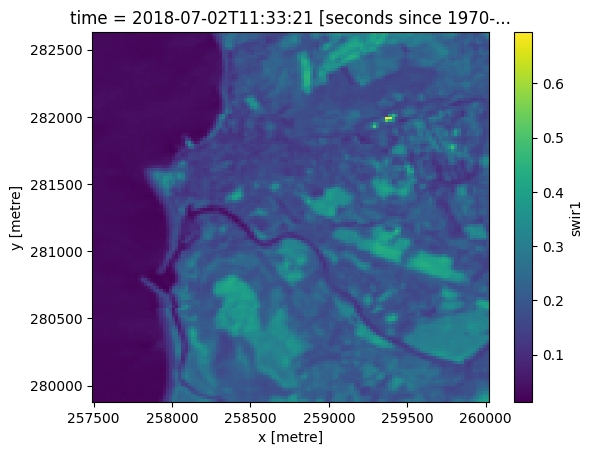

In [15]:
first_timestep.plot()

### Plotting multiple timesteps
It is often useful to produce plots for a single measurement across time, for example to compare change between satellite observations or summary datasets.
To plot multiple images, skip the `.isel()` / `.sel()` step above and plot the entire `xarray.DataArray` directly. 

To plot multiple timesteps in one figure, it is necessary to instruct the `.plot()` function to put each timestep in a different column.
This is done by specifying `.plot(col="time")`:

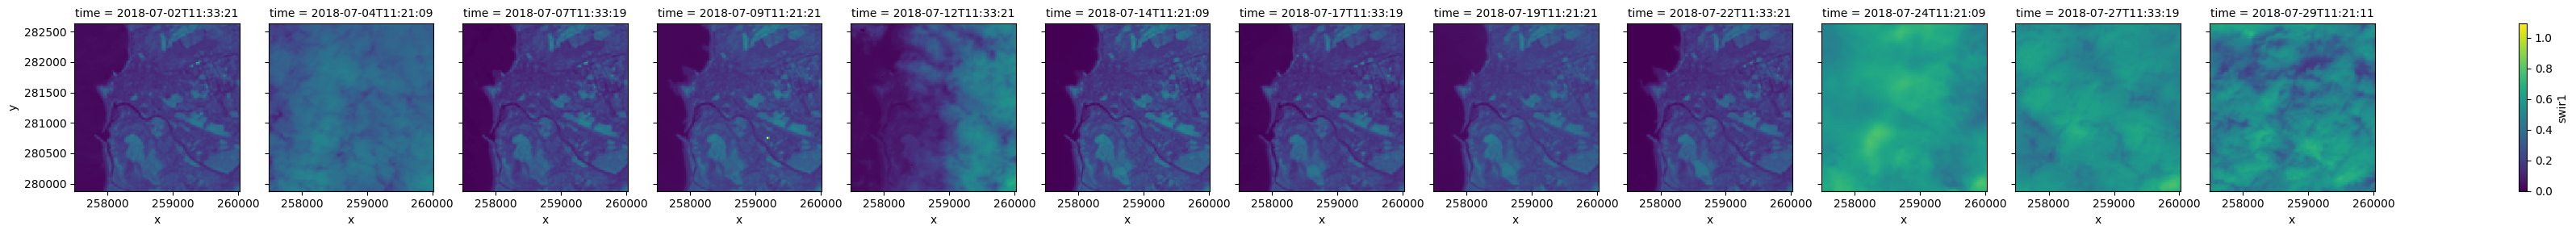

In [16]:
dataset.swir1.plot(col="time")


> This kind of plotting is called "facetted plotting". For more information, refer to the [xarray documentation](http://xarray.pydata.org/en/stable/plotting.html#faceting)

To specify the number of timesteps you can use the `col_wrap` argument as follows:

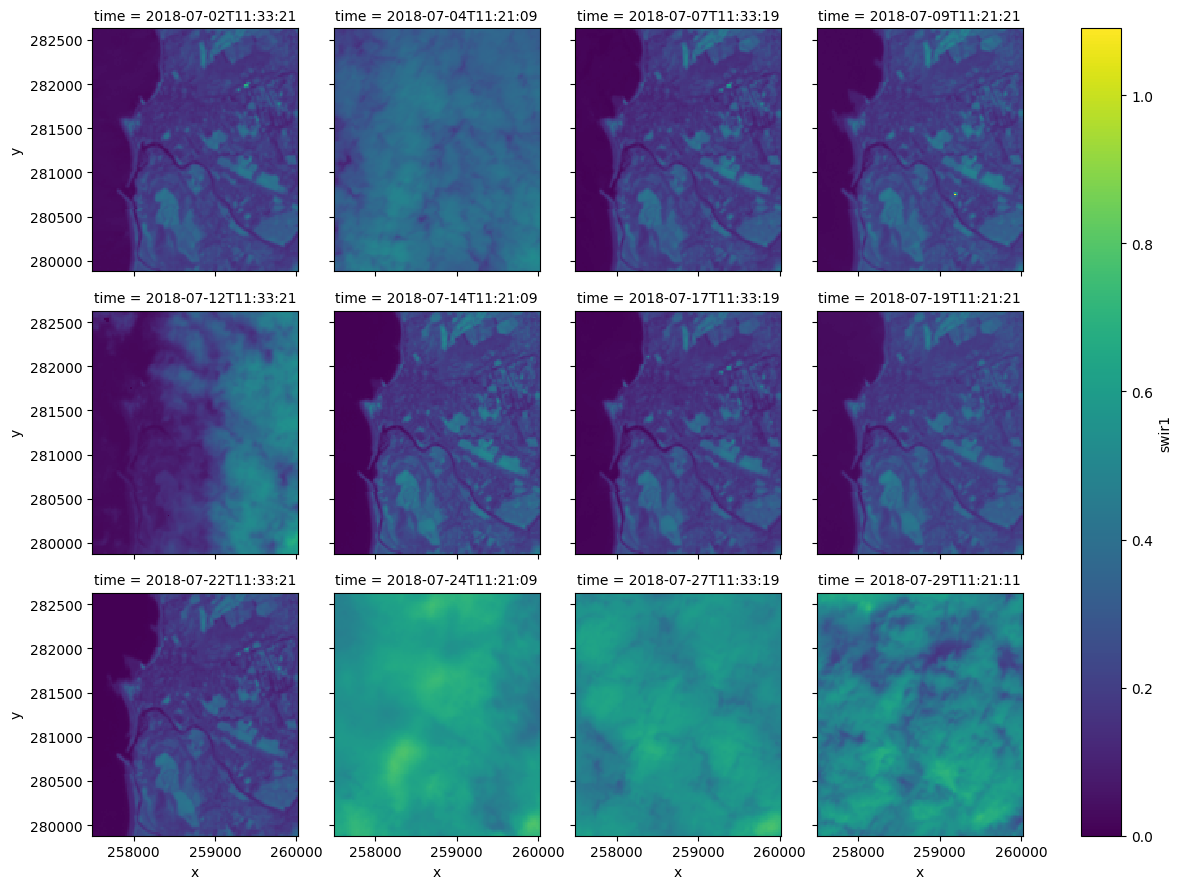

In [17]:
dataset.swir1.plot(col="time", col_wrap=4)

### Customising plot appearance
The plots above are dark and difficult to see clearly.
To improve the appearance of `xarray` plots, use the `robust=True` argument to optimise the plot colours by clipping extreme values or outliers. 
This will use the 2nd and 98th percentiles of the data to compute the color limits:

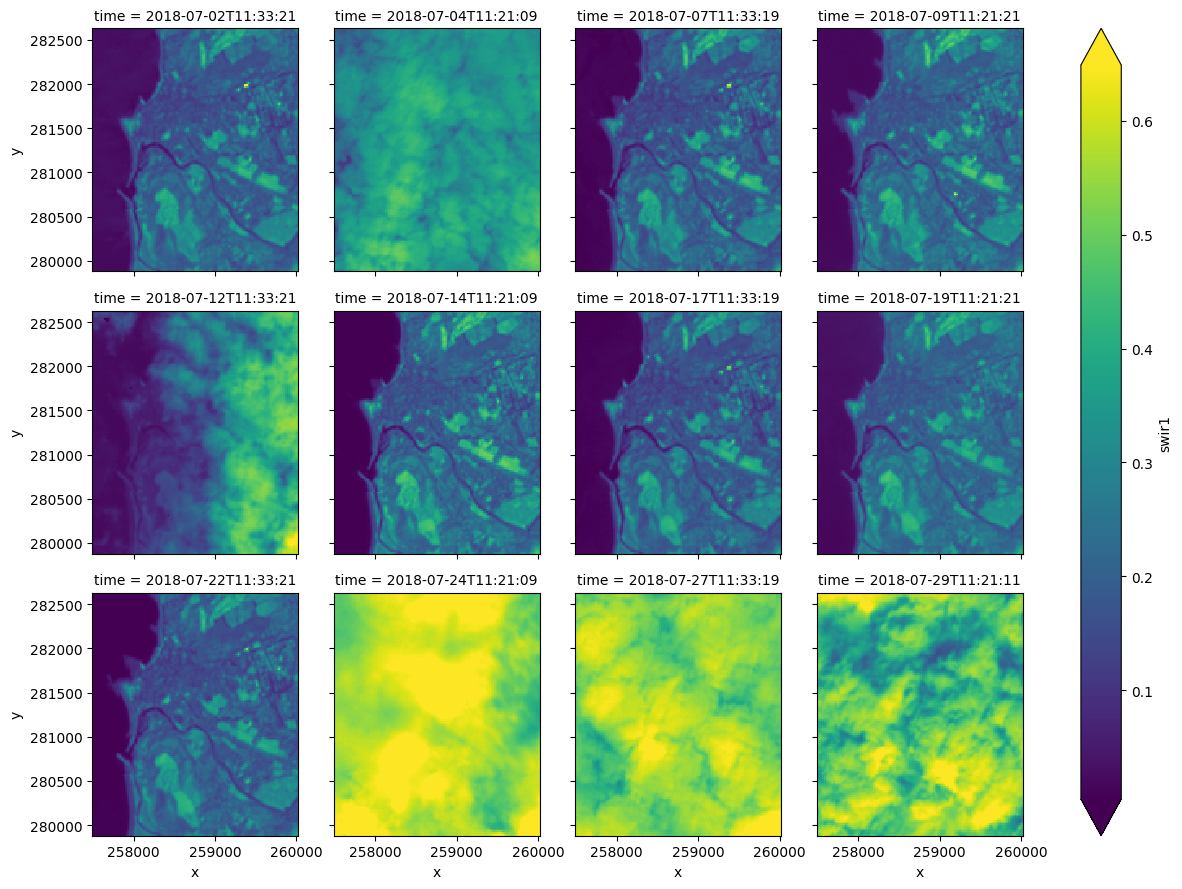

In [18]:
dataset.swir1.plot(col="time", col_wrap=4, robust=True)

Plots can be further customised by adding custom colour maps/styles using the `cmap` parameter.

When choosing a colour map for a plot, it is important to choose a set of colours that are perceived logically by the human eye. 
The best colour maps are "perceptually uniform": these colour maps increase logically from dark to light colours, where equal increases in lightness/darkness correspond to equal changes in data values. 
Some best-practice perceptually uniform colour maps include:

```
"viridis", "plasma", "inferno", "magma", "cividis"
```

> For further reading about perceptually uniform colour maps in data visualisation, refer to the [matplotlib documentation](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html)

It is also important to consider colour blindness when selecting a colour map. 
`xarray` supports many colour maps from the "colorbrewer" family of colour maps which are optimised for colour blindness.
You can use the interactive [online tool](http://colorbrewer2.org) to browse all available colour maps, or choose from one of the following commonly used options:

```
"Greys", "Purples", "Blues", "Greens", "Oranges", "Reds",
"YlOrBr", "YlOrRd", "OrRd", "PuRd", "RdPu", "BuPu", 
"GnBu", "PuBu", "YlGnBu", "PuBuGn", "BuGn", "YlGn"
```

For a full list of available colour maps you can refer to [this list](https://matplotlib.org/3.1.0/tutorials/colors/colormaps.html).

The example cell below plots the data with the perceptually uniform `magma` colour map:


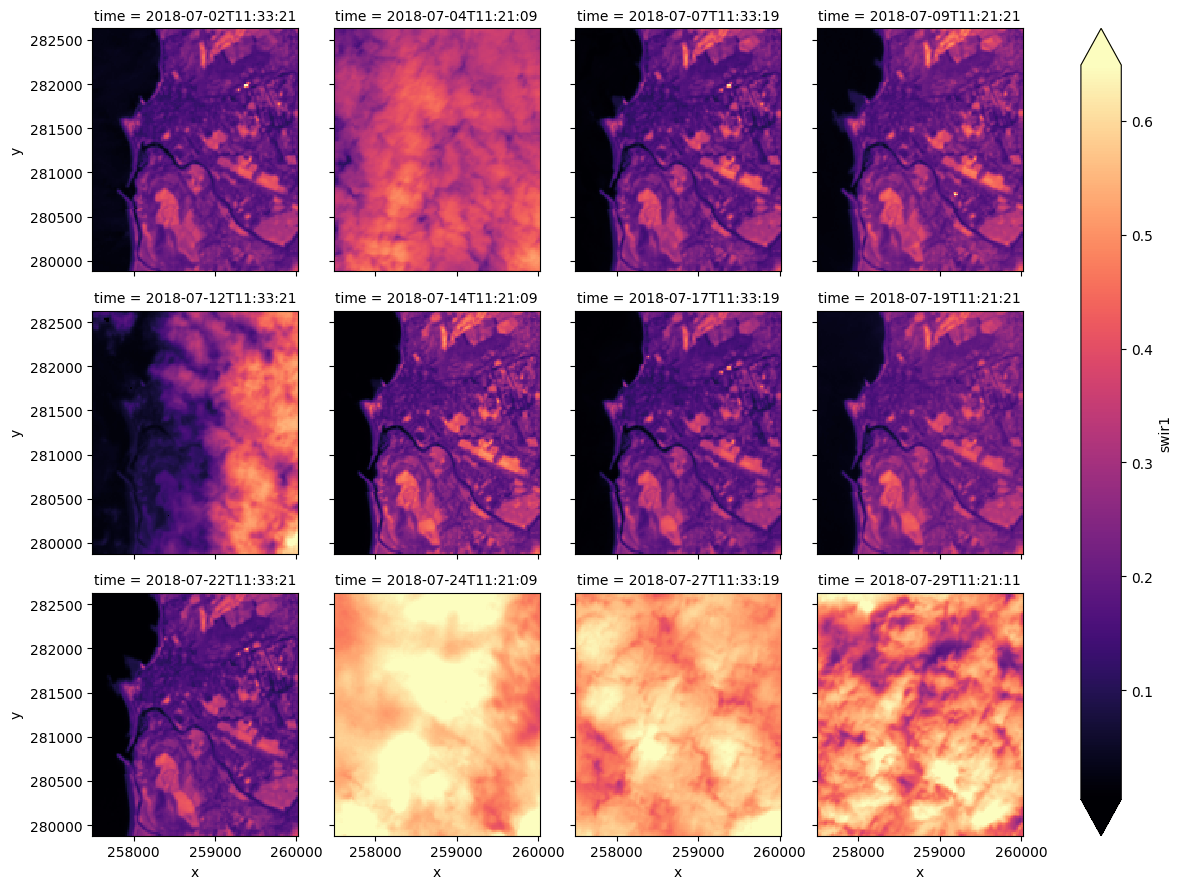

In [19]:
dataset.swir1.plot(col="time", col_wrap=4, robust=True, cmap="magma")

## Plotting true or false colour RGB images
Although `xarray` makes it easy to plot single band images, plotting a three band colour photo-like image is less straightforward.

To make this easier, Living Wales provides a custom `rgb()` function that is designed for plotting three band images.
The `rgb()` function maps three data variables/measurements from the loaded dataset to the red, green and blue channels that are used to make a three-colour image.

Providing the `red`, `green` and `blue` measurements from a dataset will produce a true colour image (i.e., how humans view the landscape).
Providing `nir`, `red` and `green` measurements or any other set of three satellite bands from a dataset will produce a false colour image.

> [Learn more about colour rendering](https://en.wikipedia.org/wiki/False_color#True_color).

Hence, the `rgb()` function can be used to visualise the data returned by a query.
It requires the minimum input of:

* `ds:` The `xarray.Dataset` object
* `bands:` Three bands for display (these must be measurements found in the dataset) 
* `index:` The timestep to view, default is `0`

### Plotting a single timestep

The time dimension of an `xarray.Dataset` describes how many timesteps exist for the loaded data.
In the `rgb()` function, the `index` variable is asking for which timesteps to view (similar to the `isel()` example above).
Remember: counting in Python begins at 0 so to view the earliest timesteps set `index=0`.

> *Hint*: To get the last image, you can use a time step value of `-1`

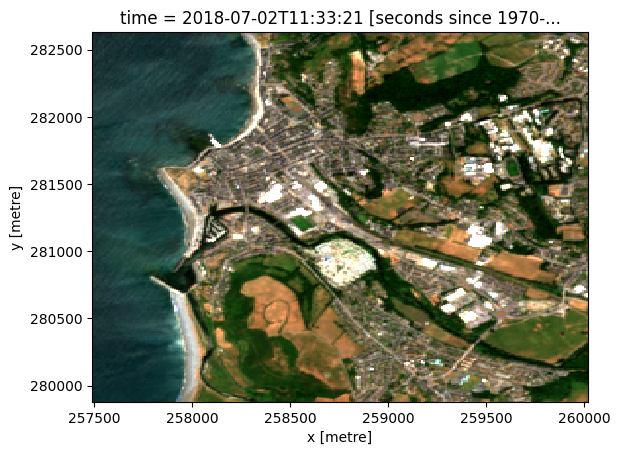

In [20]:
# View a red, green, blue (true colour) image of the first timestep
rgb(dataset, bands=["red", "green", "blue"], index=0, robust=True)

It is possible to change the input bands to plot a false colour image, which can provide different insights in a landscape.
The false colour band combination (`swir1`, `nir`, `green`) emphasises growing vegetation in green, and water in deep blue/black:

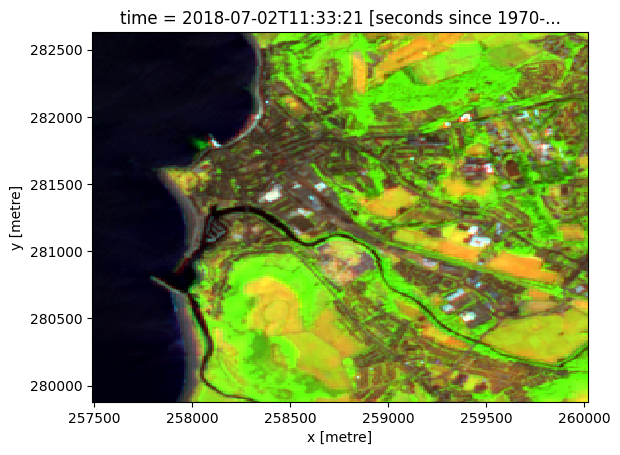

In [21]:
# View a swir1, nir, green (false colour) image of the first timestep
rgb(dataset, bands=['swir1', 'nir', 'green'], index=0, robust=True)

### Plotting multiple timesteps
As discussed in the [single band example above](#Plotting-multiple-timesteps), it can be useful to visualise multiple timesteps in a single plot (e.g. to compare change over time).

The `rgb()` function can also do this, as long as a list of timesteps to view is provided to the `index` argument, e.g. `index=[X1, X2, ...]`.
The example cell below plots the first and sixth image in the dataset using `index=[0, 5]` (remembering that counting in Python starts at 0):

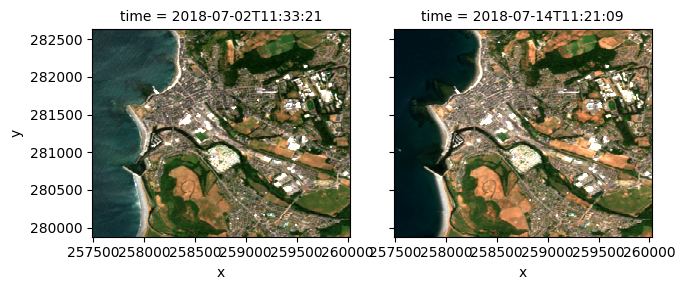

In [22]:
# View a true colour image for the first and sixth timesteps
rgb(dataset, bands=['red', 'green', 'blue'], index=[0, 5], robust=True)

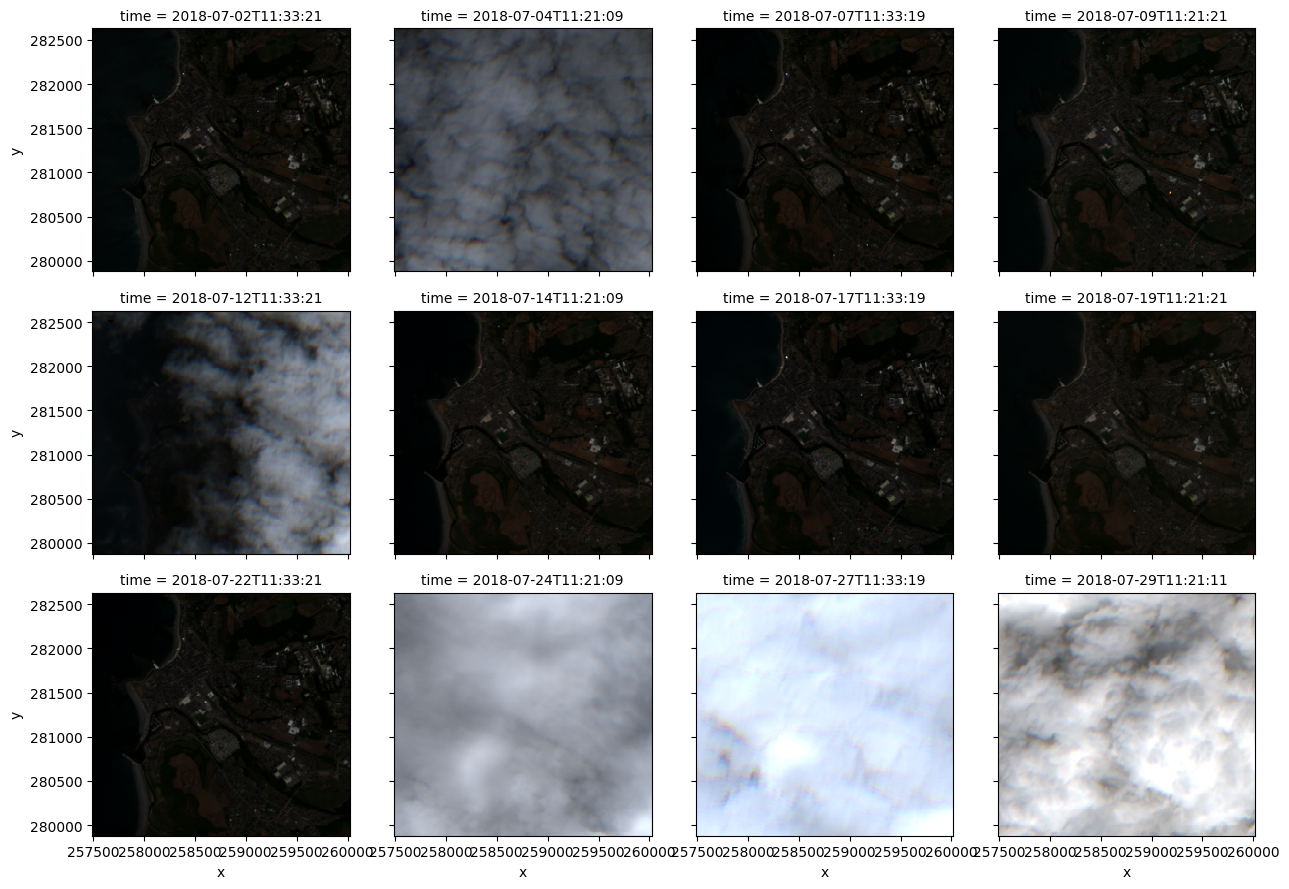

In [23]:
# Plot all timesteps in the dataset
rgb(dataset, bands=['red', 'green', 'blue'], col="time", robust=True)

### Customising plot appearance
By default, `rgb()` generates plots with `robust=True` to improve the appearance of the images by clipping out the darkest and brightest 2% of pixels, using the 2nd and 98th percentiles of the data to compute the colour limits

If this default provides poor results, the plot's colour stretch can be customised using the `percentile_stretch` parameter. 
This clips the most extreme minimum and maximum values in the dataset, improving the contrast and appearance of the plot.

For example, specifying `percentile_stretch=[0.02, 0.6]` will clip out the darkest and brightest 2% and 40% of pixels, respectively:

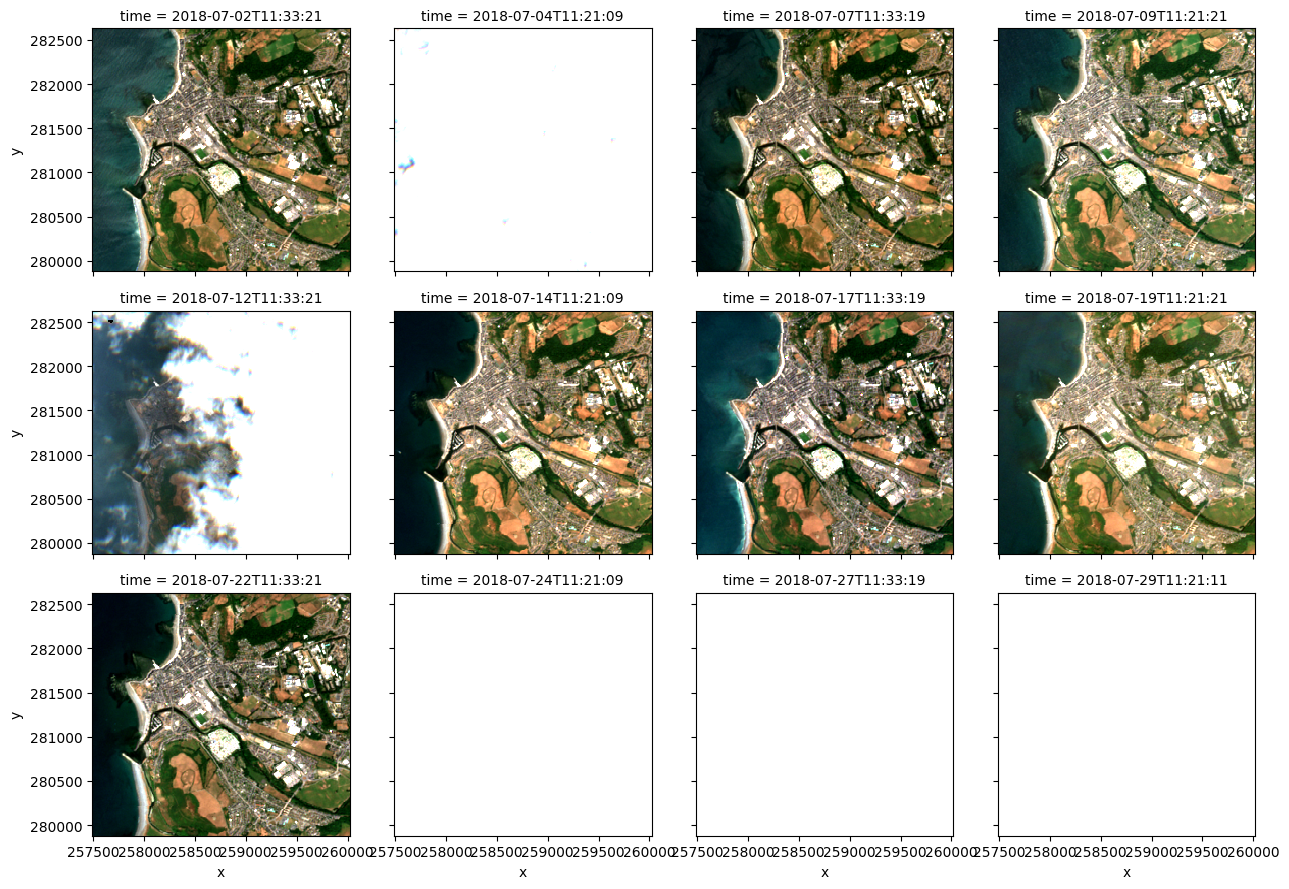

In [25]:
rgb(dataset, bands=['red', 'green', 'blue'], col="time", percentile_stretch=[0.02, 0.6])

## Recommended next steps

For more advanced information about working with Jupyter Notebooks or JupyterLab, see the [JupyterLab documentation](https://jupyterlab.readthedocs.io/en/stable/user/notebook.html).

To continue working through the notebooks in this beginner's guide, the following notebooks are designed to be worked through in the following order:

1. **[Introduction to jupyter Notebooks](01_Introduction_jupyter_notebooks.ipynb)**
2. **[Wales Open Data Cube](02_Wales_Open_Data_Cube.ipynb)**
3. **[Products and measurements](03_Products_and_measurements.ipynb)**
4. **[Loading data in WDC](04_Loading_data.ipynb)**
5. **Plotting (this notebook)**
6. **[Using Sentinel-2 data](06_Using_Sentinel2_data.ipynb)**
7. **[Calculating band indices](07_Calculating_band_indices.ipynb)**
8. **[Generating composites](08_Generating_composites.ipynb)**
9. **[Zonal_statistics](09_Zonal_statistics.ipynb)**


Once you have worked through the beginner's guide, you can explore the "Case Studies" directory, which provides examples of applications within Wales Open Data Cube.